In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to clustering and k-means

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Format and preprocess data for clustering
- Perform a K-Means clustering analysis
- Evaluate clusters for fit

![](http://img.tesco.com/Groceries/pi/476/5011546405476/IDShot_540x540.jpg)

# Building big strong clusters will make you a better data scientist!


# What's the difference between supervised and unsupervised learning?

**Classification** - create a model to predict which group a point belongs to

**Clustering** - find groups that exist in the data already

### Helpful uses for clustering: 
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

# Great. Clustering is useful.
-
# Any ideas how to algorithmically tell which groups are different?

![](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/images/clustering.gif)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

These tutorial images come from Andrew Moore's CS class at Carnegie Mellon. His slide deck is online here: https://www.autonlab.org/tutorials/kmeans11.pdf. He also links to more of his tutorials on the first page. 


# Let's practice a toy example by hand. Take a 1-dimensional array of numbers:

In [1]:
arr = [2, 5, 6, 8, 12, 15, 18, 28, 30]

Pick k=3 random starting centroids and let the other points fall into clusters based on the closest centroid. Then, reassign your centroids based on the mean value of your cluster and repeat the process. 

Check with your neighbors. Do you have the same clusters? Why or why not?

#### K Means is a powerful algorithm, but different starting points may give you different clusters. You won't necessarily get an optimal cluster.  

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- ranges from 0 to very high values
- low inertia = dense clusters

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


**Inertia** -- sum of squared errors for each cluster
- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

$^*$<https://en.wikipedia.org/wiki/Silhouette_(clustering)>


# How do I know which K to pick?

Sometimes you have good context:
   - I need to create 3 profiles for marketing to target

Other times you have to figure it out:
   - My scatter plots show 2 linearly separable clusters

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn import datasets, preprocessing, metrics
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Guided practice
Let's do some clustering with the iris dataset.

In [3]:
# Check out the dataset and our target values
df = pd.read_csv("./data/iris.csv")
print (df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's plot the data to see the distributions:

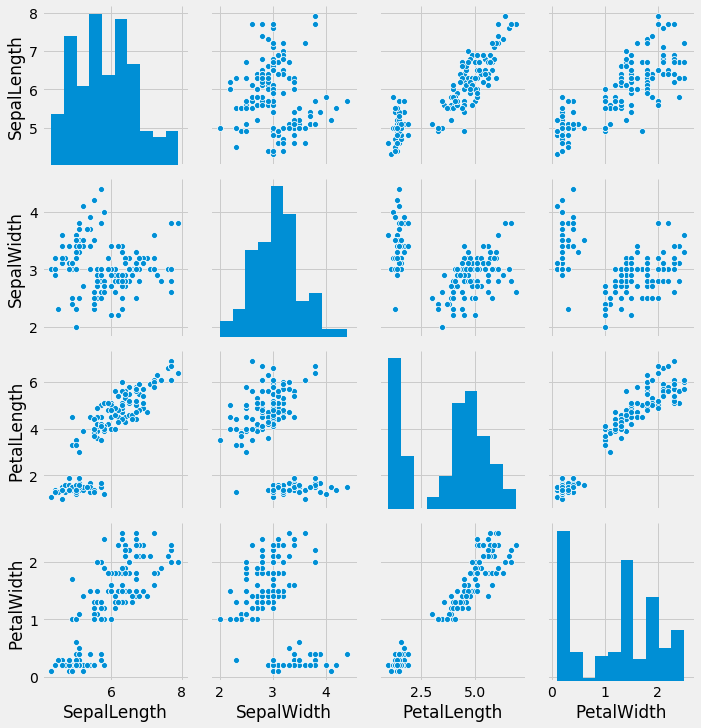

In [4]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [5]:
cols

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[cols])

In [8]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [10]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We can use Scikit's built-in functions to determine the locations of the labels, centroids, and cluster inertia:

In [11]:
inertia

NameError: name 'inertia' is not defined

In [12]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

And to compute the clusters' silhouette coefficient:


In [13]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150884

...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [14]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this. 

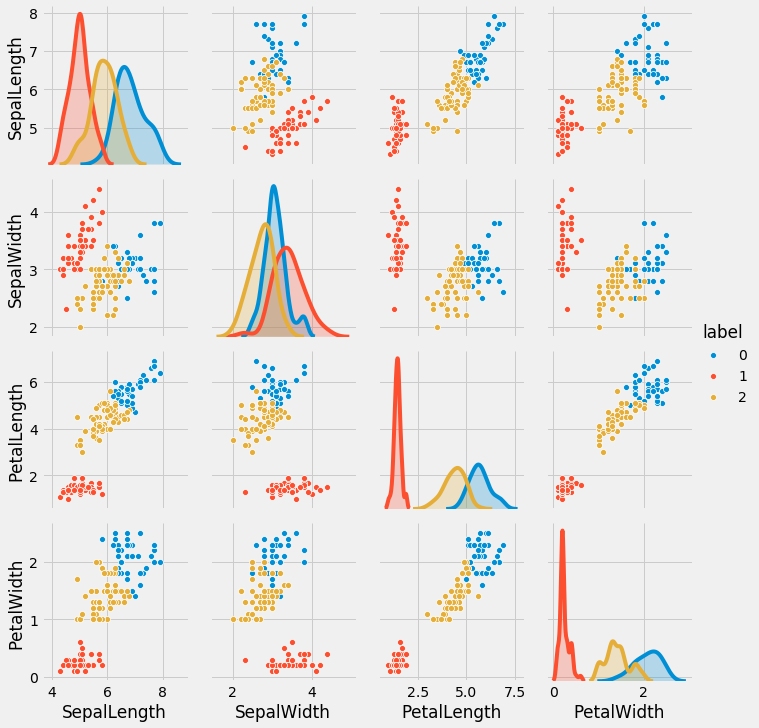

In [15]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

For comparison, here's the data colored by name of the plant. 


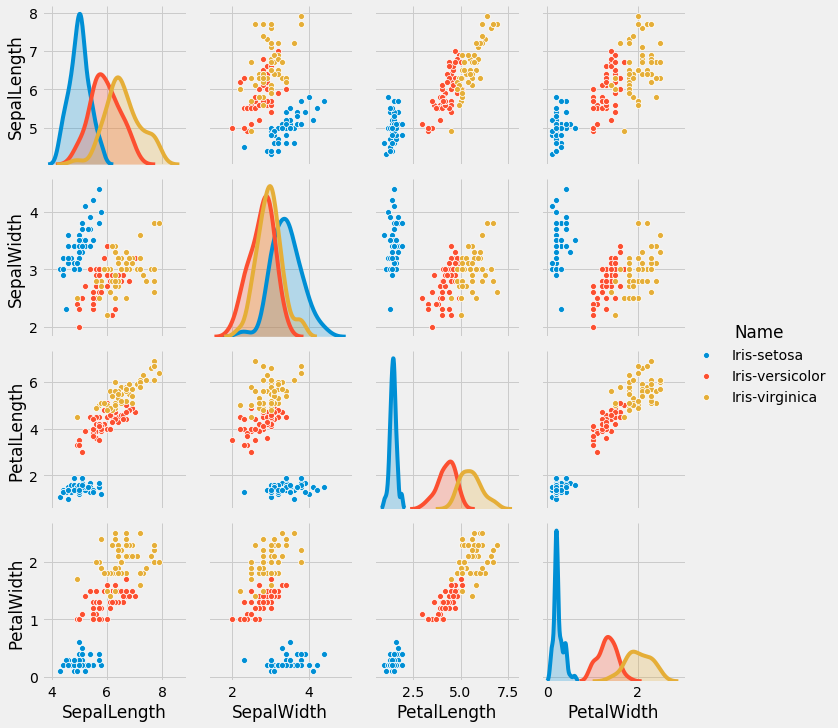

In [16]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

## What if we don't know the ideal K? 
It's unsupervised, and sometimes we don't know what K to select!

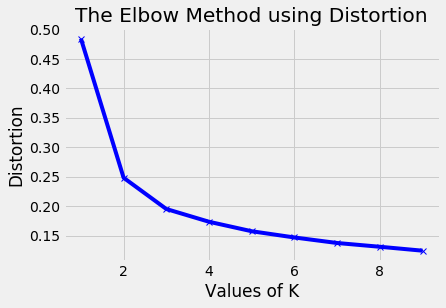

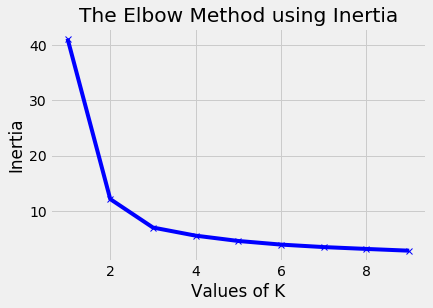

In [17]:
from sklearn import metrics 
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)     
      
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

# Independent practice

A) Repeat our clustering analysis for the foods nutrients dataset (below). There are no "true" labels for this one!

B) Then go back up and separate our iris observations into *different* numbers of clusters.

- How do the inertia and silhouette scores change?
- What if you don't scale your features?
- Is there a 'right' k? Why or why not?

Repeat this for the foods nutrients dataset.

In [41]:
# read nutrients data
df = pd.read_csv('./data/nutrients.txt',delimiter = '\s+')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [42]:
df.describe(include = 'all')

,Name,Energy,Protein,Fat,Calcium,Iron
count,27,27.000000,27.000000,27.000000,27.000000,27.000000
unique,27,NaN,NaN,NaN,NaN,NaN
top,Canned beef,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,207.407407,19.000000,13.481481,43.962963,2.381481
std,NaN,101.207806,4.251696,11.257033,78.034254,1.461305
min,NaN,45.000000,7.000000,1.000000,5.000000,0.500000
25%,NaN,135.000000,16.500000,5.000000,9.000000,1.350000
50%,NaN,180.000000,19.000000,9.000000,9.000000,2.500000
75%,NaN,282.500000,22.000000,22.500000,31.500000,2.600000


In [35]:
# read in the nutrients data

,Name,Energy,Protein,Fat,Calcium,Iron
count,27,27.000000,27.000000,27.000000,27.000000,27.000000
unique,27,NaN,NaN,NaN,NaN,NaN
top,Pork roast,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,207.407407,19.000000,13.481481,43.962963,2.381481
std,NaN,101.207806,4.251696,11.257033,78.034254,1.461305
min,NaN,45.000000,7.000000,1.000000,5.000000,0.500000
25%,NaN,135.000000,16.500000,5.000000,9.000000,1.350000
50%,NaN,180.000000,19.000000,9.000000,9.000000,2.500000
75%,NaN,282.500000,22.000000,22.500000,31.500000,2.600000


In [48]:
# scaler
scaler = MinMaxScaler()
cols = df.columns.drop('Name')
cols
X_scaled = scaler.fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632,0.342088
std,0.269887,0.223773,0.296238,0.215564,0.265692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050,0.154545
50%,0.360000,0.631579,0.210526,0.011050,0.363636
75%,0.633333,0.789474,0.565789,0.073204,0.381818
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#scale your data

Energy  Protein  Fat  Calcium  Iron
label Name                                                    
0     Beefsteak               375       19   32        9   2.6
      Braised beef            340       20   28        9   2.6
      Hamburger               245       21   17        9   2.7
      Pork roast              340       19   29        9   2.5
      Pork simmered           355       19   30        9   2.4
      Roast beef              420       15   39        7   2.0
      Roast lamb leg          265       20   20        9   2.6
      Roast lamb shoulder     300       18   25        9   2.3
      Smoked ham              340       20   28        9   2.5
1     Baked bluefish          135       22    4       25   0.6
      Beef tongue             205       18   14        7   2.5
      Broiled chicken         115       20    3        8   1.4
      Broiled mackerel        200       19   13        5   1.0
      Canned chicken          170       25    7       12   1.5
      Canned crabmeat          90       14    2       38   0.8
      Canned mackerel         155       16    9      157   1.8
      Canned salmon           120       17    5      159   0.7
      Canned tuna             170       25    7        7   1.2
      Fried haddock           135       16    5       15   0.5
      Fried perch             195       16   11       14   1.3
2     Beef heart              160       26    5       14   5.9
      Canned beef             180       22   10       17   3.7
      Canned clams             45        7    1       74   5.4
      Canned sardines         180       22    9      367   2.5
      Canned shrimp           110       23    1       98   2.6
      Raw clams                70       11    1       82   6.0
      Veal cutlet             185       23    9        9   2.7

,0,1,2,3,4
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632,0.342088
std,0.269887,0.223773,0.296238,0.215564,0.265692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050,0.154545
50%,0.360000,0.631579,0.210526,0.011050,0.363636
75%,0.633333,0.789474,0.565789,0.073204,0.381818
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
K = range(1,20) 
inertias = []
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)     
    inertias.append(kmeanModel.inertia_) 
  

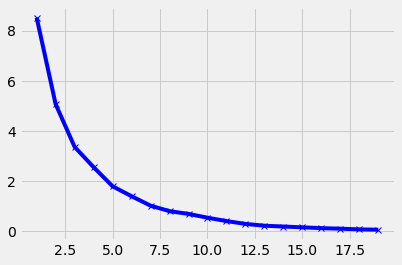

In [52]:
plt.plot(K, inertias, 'bx-') 

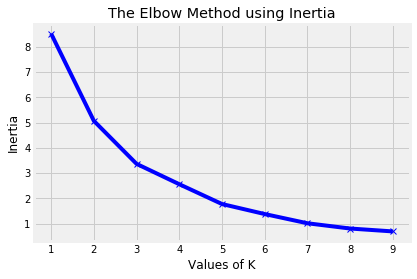

In [54]:
labels = kmeans.labels_
#df['labels'] = labels
#df
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Evaluating with Silhouette Scores
Clusters should be 1) evenly distributed, and 2) distinct from each other (disctinction == 1)

For n_clusters = 2 The average silhouette_score is : 0.3785312581749527
For n_clusters = 3 The average silhouette_score is : 0.43310014530591157
For n_clusters = 4 The average silhouette_score is : 0.4315267947981755
For n_clusters = 5 The average silhouette_score is : 0.39457673409337235
For n_clusters = 6 The average silhouette_score is : 0.36893703291122054


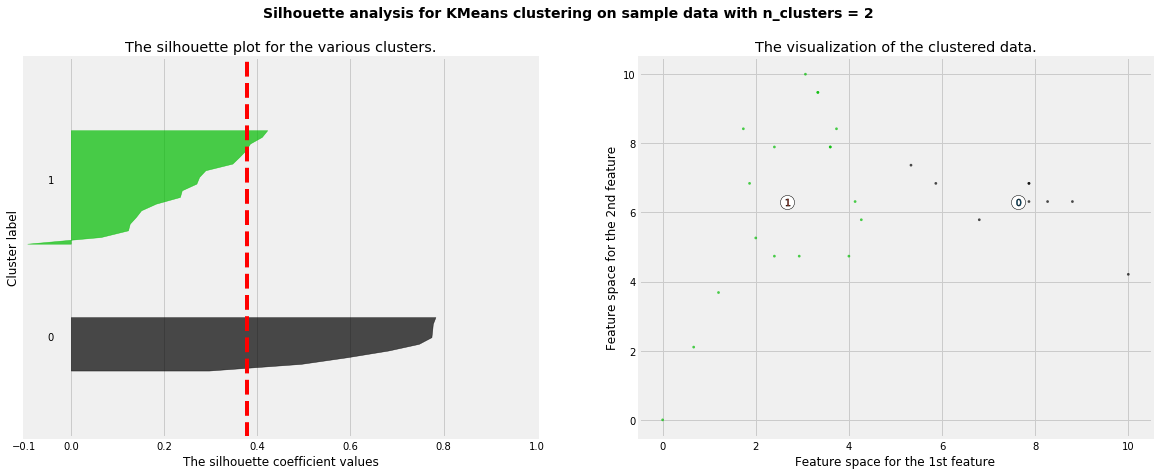

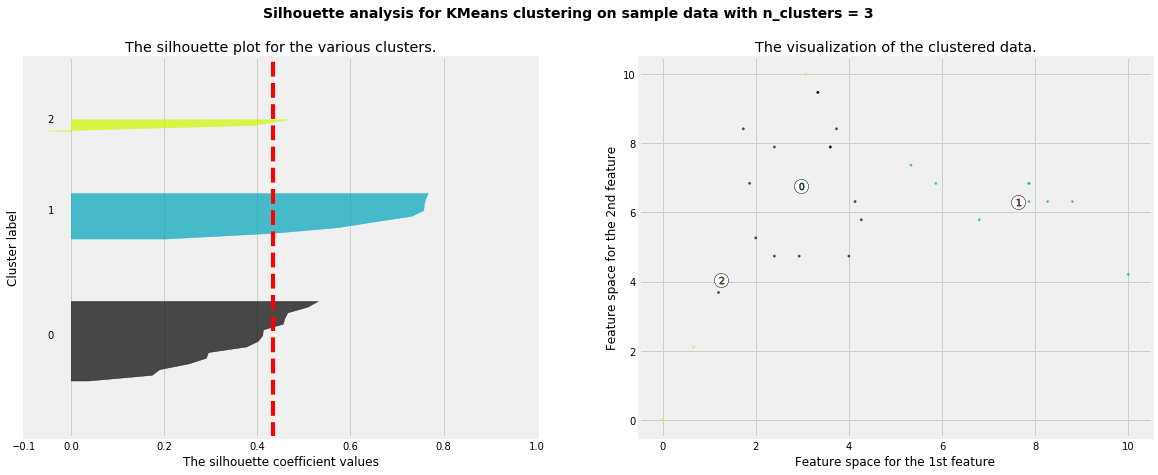

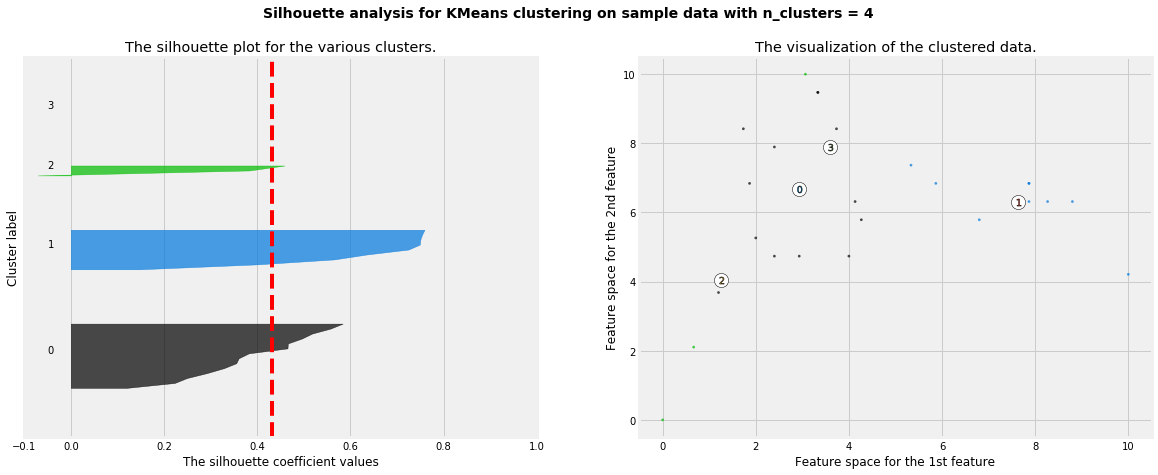

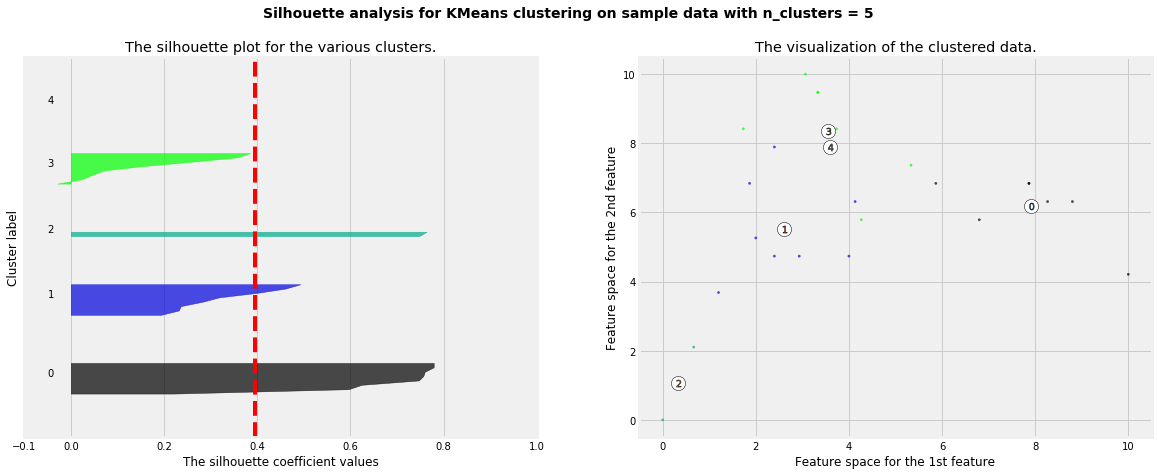

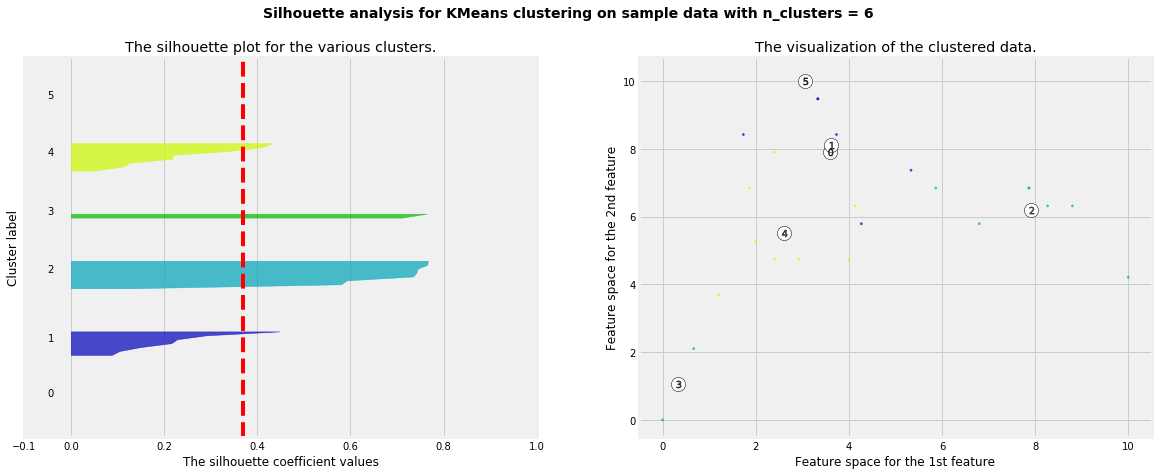

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

K = [2, 3, 4, 5, 6]

for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.\
    
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    
    
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

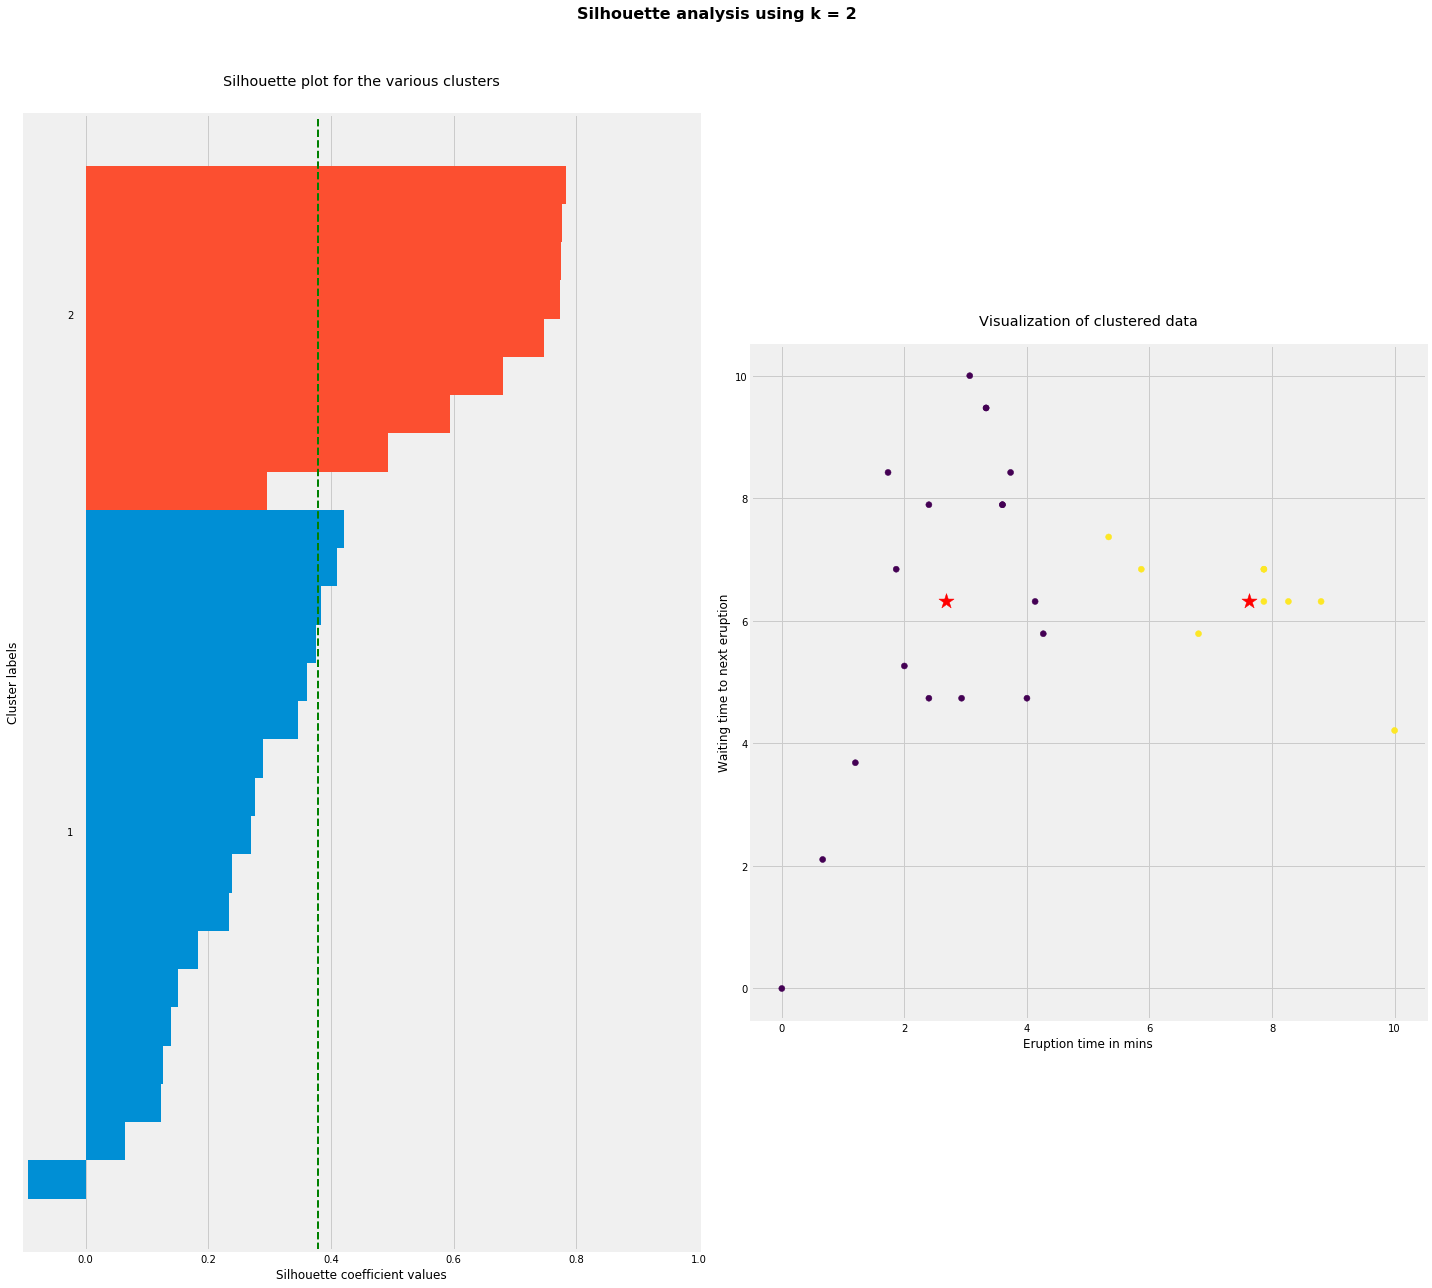

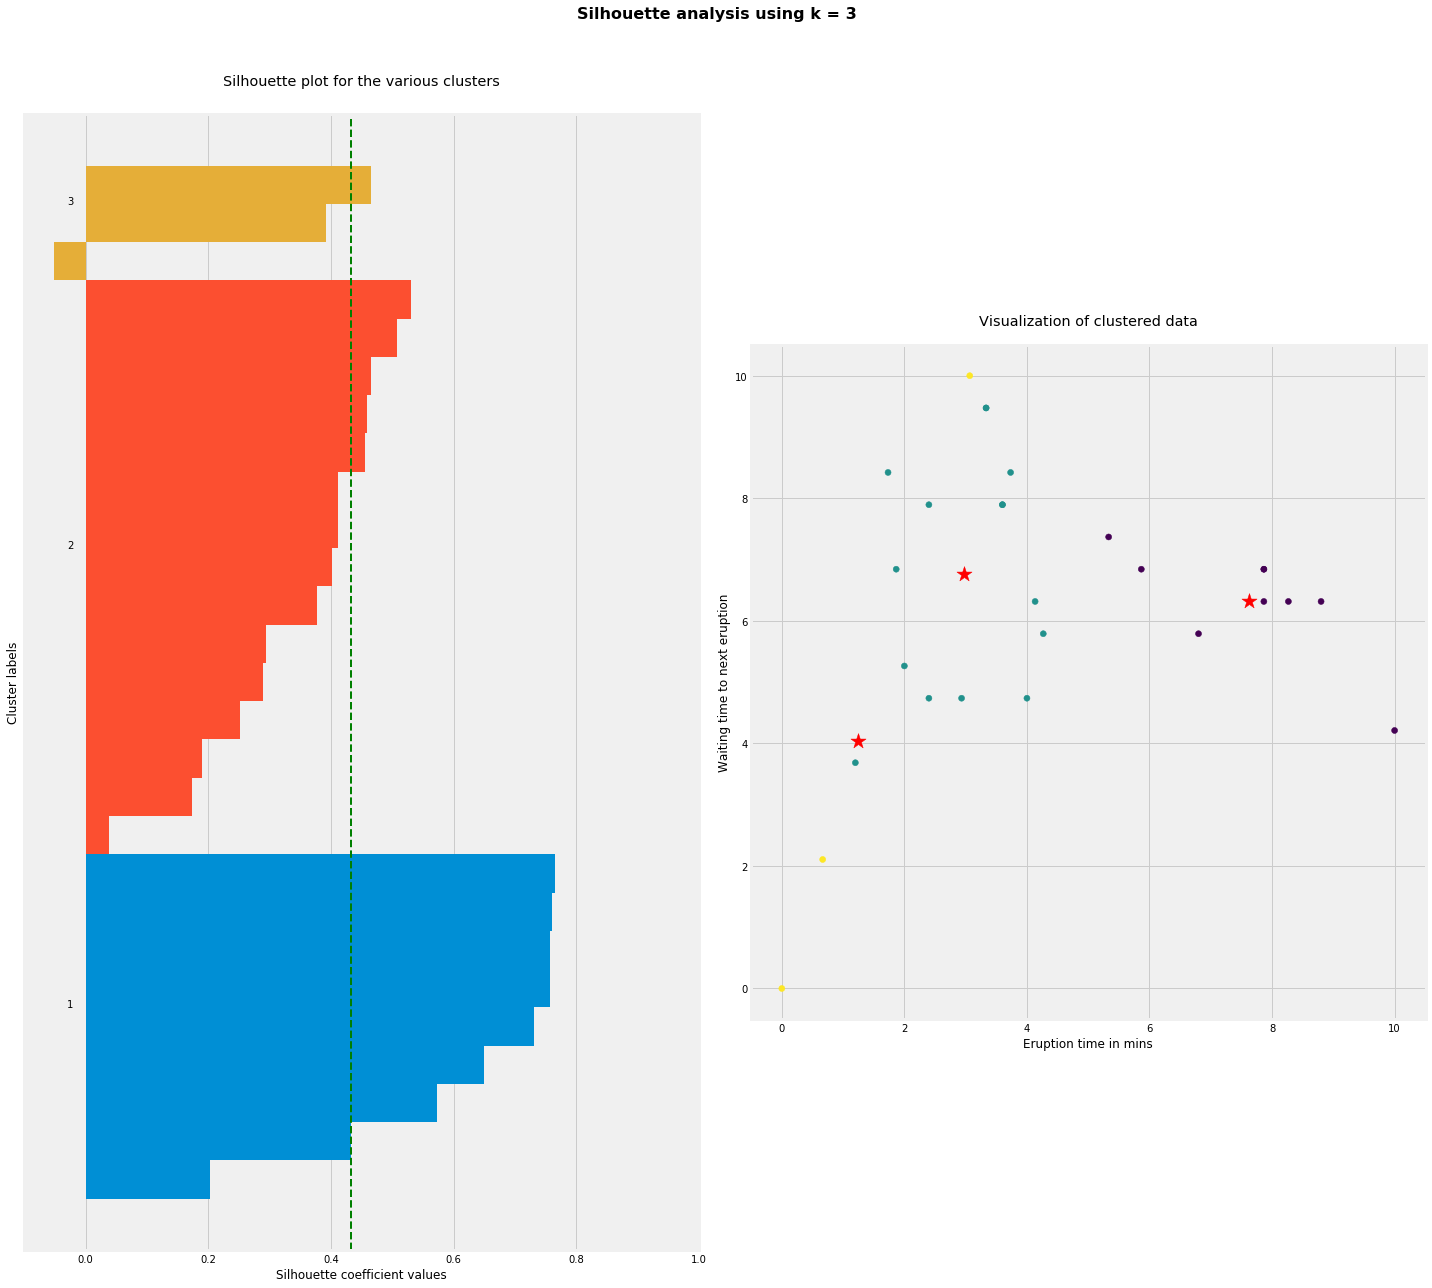

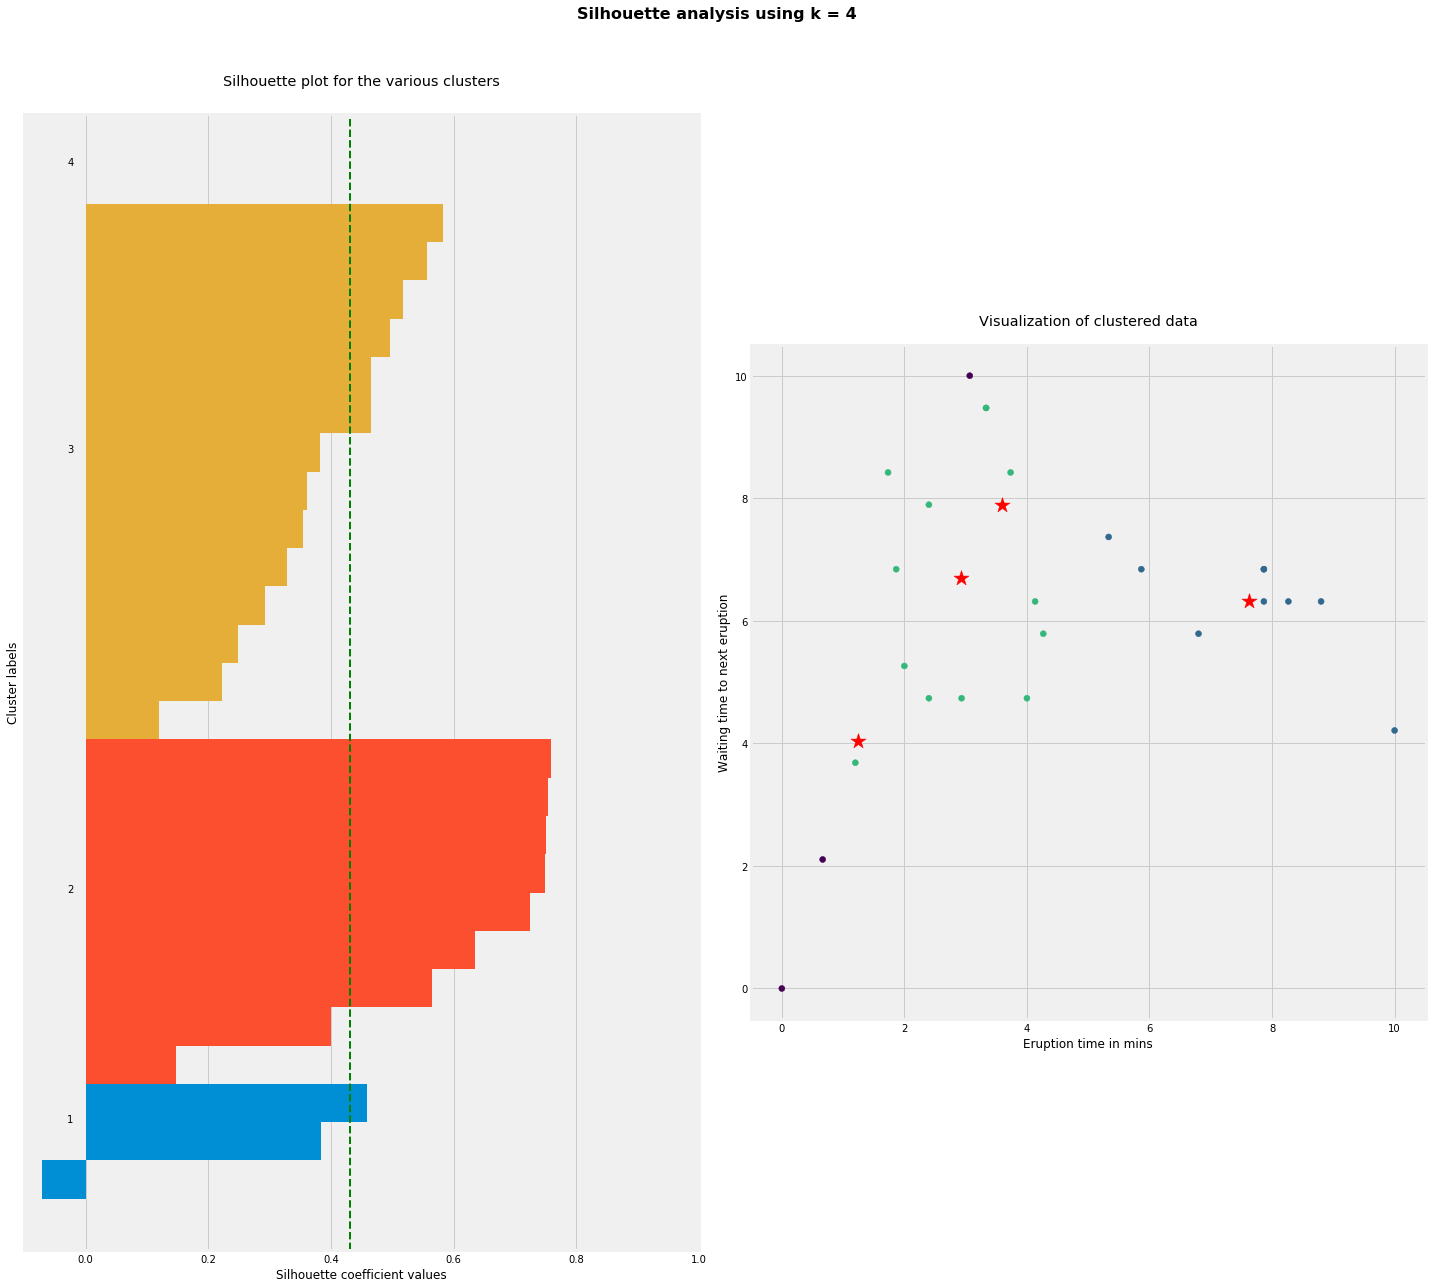

In [49]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 17)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_scaled)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    #ax2.set_xlim([-2, 2])
    #ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.